## A HIDDEN MARKOV MODEL OF VISUAL ATTENTION

#### Part 1:

a) forwar simulation from the HMM.<br>


Let first simulate One Neutron

In [4]:
### We are using this constant to simulate
alpha = 0.9
beta = 0.2
gamma = 0.1
lambda_1 = 1
lambda_2 = 5

In [5]:
# lets contruct the gamma matrix
gamma_matrix = [[1.0-gamma,0,gamma],[0, 1.0-gamma,gamma],[beta/2.0,beta/2.0,1-beta]]
print(gamma_matrix)


[[0.9, 0, 0.1], [0, 0.9, 0.1], [0.1, 0.1, 0.8]]


In [6]:
# let contruct a representation of C
C =[0 for i in range (10)]
print(C)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
## C_1 is alway C_1 = 2
C[0] = [0,0,1]
print(C)

[[0, 0, 1], 0, 0, 0, 0, 0, 0, 0, 0, 0]


The other $C_t$ are given as such $P(C_{t+1} =d | C_t = c) = \gamma_{c,d}$

In [8]:
## Let calculate for C_2
## We know C_1 can only take one value 2
C[1] = [gamma_matrix[2][0],gamma_matrix[2][1],gamma_matrix[2][2]]
print(C)

[[0, 0, 1], [0.1, 0.1, 0.8], 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
# For the rest C_t are equal the gamma matrix
# Since they can take all the values
for i in range(2,10):
    C[i] = gamma_matrix
print(C)

[[0, 0, 1], [0.1, 0.1, 0.8], [[0.9, 0, 0.1], [0, 0.9, 0.1], [0.1, 0.1, 0.8]], [[0.9, 0, 0.1], [0, 0.9, 0.1], [0.1, 0.1, 0.8]], [[0.9, 0, 0.1], [0, 0.9, 0.1], [0.1, 0.1, 0.8]], [[0.9, 0, 0.1], [0, 0.9, 0.1], [0.1, 0.1, 0.8]], [[0.9, 0, 0.1], [0, 0.9, 0.1], [0.1, 0.1, 0.8]], [[0.9, 0, 0.1], [0, 0.9, 0.1], [0.1, 0.1, 0.8]], [[0.9, 0, 0.1], [0, 0.9, 0.1], [0.1, 0.1, 0.8]], [[0.9, 0, 0.1], [0, 0.9, 0.1], [0.1, 0.1, 0.8]]]


$Z_{t,i}$ are given as such $P(Z_{t,i} = 1 | C_t =c) = \begin{Bmatrix}
1-\alpha & if & c= 0  \\
\alpha &  if & c= 1  \\
 0.5&   if & c= 2
\end{Bmatrix}$

The probability of $Z_{1,1}$ to $Z_{1,n}$ are the same.
So need only one $Z_{t}$ for each time stamp

In [10]:
## let contruct a representation of Z
Z = [0 for i in range(10)]
Z

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
## lets calculate probability for Z_1 given C_1
## C_1 can only take one value 2
Z[0] = [0,0,0.5]

In [12]:
## lets calculate probability for the rest Z =1 given C= 0, 1 or 2
for i in range(1,10):
    Z[i] = [1-alpha,alpha,0.5]
Z    

[[0, 0, 0.5],
 [0.09999999999999998, 0.9, 0.5],
 [0.09999999999999998, 0.9, 0.5],
 [0.09999999999999998, 0.9, 0.5],
 [0.09999999999999998, 0.9, 0.5],
 [0.09999999999999998, 0.9, 0.5],
 [0.09999999999999998, 0.9, 0.5],
 [0.09999999999999998, 0.9, 0.5],
 [0.09999999999999998, 0.9, 0.5],
 [0.09999999999999998, 0.9, 0.5]]

In [13]:
import random



X = [0, 1, 2]
probabilities = [0.9, 0, 0.1]

def simulate():
    return random.choices(X, weights=probabilities, k=1)[0]

# Simulate 10 times
for _ in range(10):
    result = simulate()
    print("Outcome:", result)

Outcome: 0
Outcome: 0
Outcome: 0
Outcome: 2
Outcome: 0
Outcome: 0
Outcome: 0
Outcome: 0
Outcome: 0
Outcome: 0


In [14]:
import random

In [15]:
## Let simulate C_1 for 10 netrons meaning 10 Z
states = [0,1,2]
choice_C = Z[0][random.choices(states, weights=C[0], k=1)[0]]
pro_Z = [choice_C,1-choice_C]
states_Z = [0,1]
choice_Z = random.choices(states_Z, weights=pro_Z, k=10)
print(choice_Z)

[1, 0, 0, 1, 1, 0, 1, 0, 0, 0]


In [24]:
# let Build a function that gamma_matric given Beta and gamma
def make_gamma_matrix(beta,gamma):
    # make a zero 3 by 3 matrix
    gamma_matrix = [[1-gamma,0,gamma],[0,1-gamma,gamma],[beta/2.0,beta/2.0,1-beta]]
    return gamma_matrix

In [25]:
## lets test make_gamma_matrix() with these variables
beta = 0.2
gamma = 0.1
gamma_matrix = make_gamma_matrix(beta,gamma)
gamma_matrix

[[0.9, 0, 0.1], [0, 0.9, 0.1], [0.1, 0.1, 0.8]]

$P(C_1=2) = 1$, The other $C_t$ are given as such $P(C_{t+1} =d | C_t = c) = \gamma_{c,d}$

In [27]:
## let a make function that randomly produces states for Ct given a Gamma matrix and timestamp
### and number of time to run, defualt is 1
def make_states_C(gamma_matrix,timestamp,run=1):
    ## the states for the neutron
    states = [0,1,2]
    ### The array to hold the C values
    ### the first C_1 is always in state 2
    C = [[2 for i in range(timestamp)] for i in range(run)]
    ### since the first C_1 = 2 
    choice = 2
    ## we only loop over C_2 to C_t
    for r in range(run):
        for t in range(1,timestamp):
            choice = random.choices(states, weights=gamma_matrix[choice], k=1)[0]
            C[r][t] = choice
    return C

In [34]:
## lets test make_states_C() with these variables
timestamp = 10
run = 10
result_C = make_states_C(gamma_matrix,timestamp,run)
result_C

[[2, 2, 2, 2, 0, 0, 0, 0, 0, 2],
 [2, 2, 2, 0, 0, 0, 0, 0, 0, 0],
 [2, 0, 2, 2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 0, 0, 0, 0],
 [2, 0, 0, 0, 2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1, 2, 0, 0, 0],
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0, 0, 0, 2, 2],
 [2, 1, 1, 2, 2, 2, 2, 2, 2, 2]]

$Z_{t,i}$ are given as such $P(Z_{t,i} = 1 | C_t =c) = \begin{Bmatrix}
1-\alpha & if & c= 0  \\
\alpha &  if & c= 1  \\
 0.5&   if & c= 2
\end{Bmatrix}$

The probability of $Z_{1,1}$ to $Z_{1,n}$ are the same.
So need only one $Z_{t}$ for each time stamp

In [52]:
# let Build a probability matrix for Z given alpha
alpha = 0.9
alpha_matrix = [[alpha,1-alpha],[1-alpha,alpha], [0.5,0.5]]
neurons = 10

In [32]:
## let a make function that randomly produces states for Z_ti given a Given Ct, 
# alpha, timestamp and number netrouns i
def make_states_Z(C, timestamp,neurons,alpha_matrix):
    ## states for Z
    states = [0,1]
    ### create txi matrix, 
    Z = [[] for i in range(timestamp)]
    for t in range(timestamp):   
        C_state = C[t]
        choice = random.choices(states, weights=alpha_matrix[C_state], k=neurons)
        Z[t]= choice
    return Z

In [53]:
## lets test mmake_states_Z() with these variables
result_Z = make_states_Z(result_C[0], timestamp,neurons,alpha_matrix)
result_Z

[[0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
 [1, 0, 0, 0, 1, 1, 0, 1, 1, 0],
 [1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 0, 1, 0, 1, 1]]

$X_{t,i}$ is given by this probability distribution $P(X_{t,i} = x | Z_{t,i} = z) = e^{\lambda_z}\frac{\lambda_z^x}{x!}$

In [50]:
# Let make a function that computes X given lambda (0,1) and Z
import numpy as np
from scipy.stats import poisson
def simulate_X(Z,lambda_vec,neurons,timestamp):
    ## make tXi 
    X = [[0 for i in range(neurons)] for i in range(timestamp)]
    for t in range(timestamp):
        for i in range(neurons):
            # Set the mean of the Poisson distribution
            mean = lambda_vec[Z[t][i]]
            # Generate random numbers from Poisson distribution
            X[t][i] = poisson.rvs(mu=mean, size=1)[0]
    return X

In [58]:
## lets test simulate_X() with these variables
lambda_vec = [1,5]
result_X = simulate_X(result_Z,lambda_vec,neurons,timestamp)
result_X

[[3, 4, 5, 5, 9, 1, 2, 5, 5, 7],
 [0, 6, 0, 6, 0, 9, 0, 11, 6, 0],
 [3, 0, 2, 1, 8, 10, 0, 5, 3, 0],
 [5, 4, 0, 6, 2, 5, 2, 4, 2, 5],
 [2, 3, 0, 2, 2, 1, 1, 1, 2, 2],
 [2, 0, 1, 1, 1, 0, 0, 0, 2, 2],
 [0, 5, 0, 1, 4, 0, 1, 2, 0, 2],
 [5, 0, 1, 3, 1, 2, 2, 1, 1, 2],
 [3, 0, 5, 0, 1, 1, 4, 4, 0, 0],
 [0, 1, 0, 4, 7, 1, 6, 0, 7, 3]]

### Implement forward simulation from the Hidden Markov Model. 

In [118]:
# let put all this together an make forward simulation
class ForwardSimulationHMM:
    def __init__(self, neurons=10, timestamp=100, beta=0.2, alpha=0.9, lambda_vec=[1, 5]):
        self.neurons = neurons
        self.timestamp = timestamp
        self.beta = beta
        self.alpha = alpha
        self.lambda_vec = lambda_vec
        self.alpha_matrix = [[self.alpha,1-self.alpha],[1-self.alpha,self.alpha], [0.5,0.5]]
        self.gamma_matrix = gamma_matrix = [[1-gamma,0,gamma],
                                            [0,1-gamma,gamma],[beta/2.0,beta/2.0,1-beta]]
        self.C = []
        self.Z = []
        self.X = []
    def make_states_C(self):
        ## the states for the neutron
        states = [0,1,2]
        ### The array to hold the C values
        ### the first C_1 is always in state 2
        self.C = [2 for i in range(self.timestamp)]
        ### since the first C_1 = 2 
        choice = 2
        ## we only loop over C_2 to C_t
        for t in range(1,self.timestamp):
            choice = random.choices(states, weights=self.gamma_matrix[choice], k=1)[0]
            self.C[t] = choice
            
    def make_states_Z(self):
        ## states for Z
        states = [0,1]
        ### create txi matrix, 
        self.Z =[[] for i in range(self.timestamp)]
        for t in range(self.timestamp):   
            C_state = self.C[t]
            choice = random.choices(states, weights=self.alpha_matrix[C_state], k=self.neurons)
            self.Z[t]= choice
        
    def make_poisson_X(self):
        ## make tXi 
        self.X = np.array([[0 for i in range(neurons)] for i in range(self.timestamp)])
        for t in range(self.timestamp):
            for i in range(self.neurons):
                # Set the mean of the Poisson distribution
                mean = self.lambda_vec[self.Z[t][i]]
                # Generate random numbers from Poisson distribution
                self.X[t][i] = poisson.rvs(mu=mean, size=1)[0]
    def simulate(self):
        self.make_states_C()
        self.make_states_Z()
        self.make_poisson_X()

In [119]:
## Lets initialize The Forward Simulation
f = ForwardSimulationHMM()

In [120]:
# Lets make a stardard simulate with 10 neutrons and time frame of 100
f.simulate()

### Illustrate the implementation 

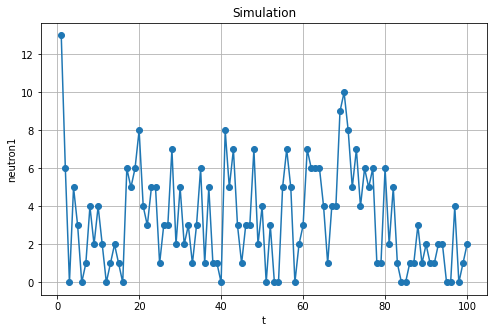

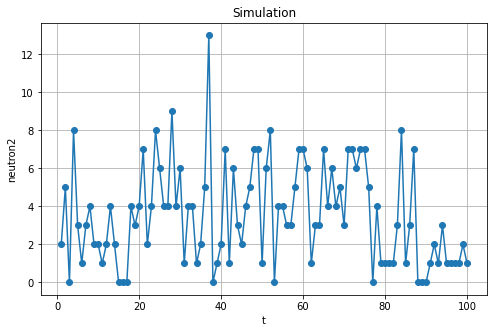

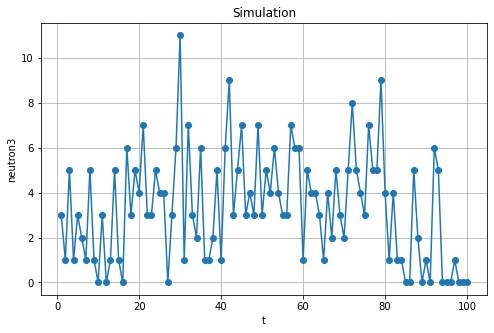

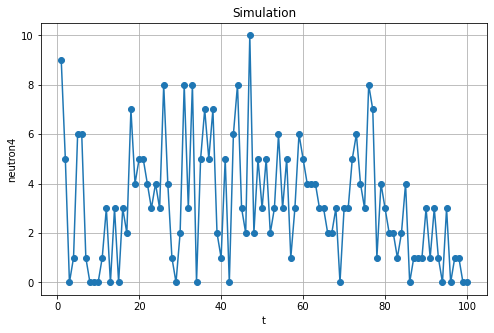

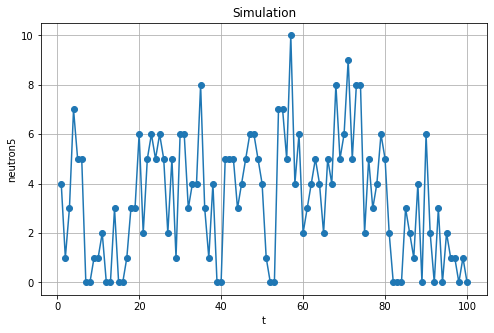

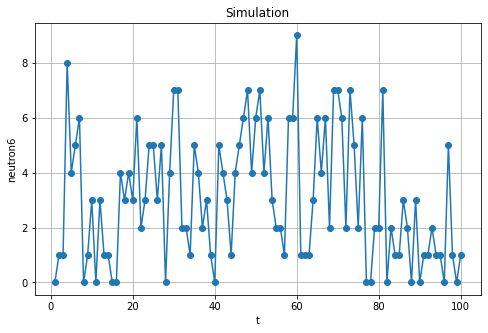

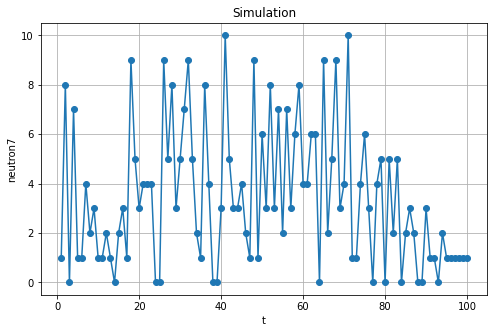

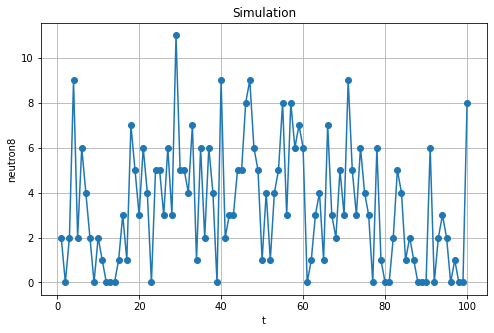

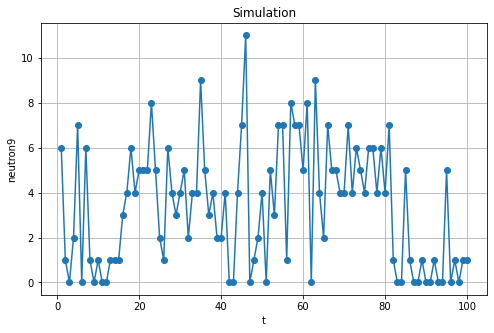

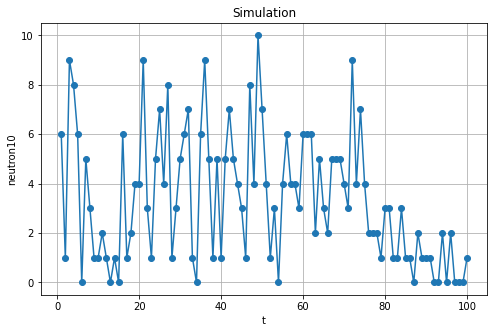

In [133]:
## lets visulize the result
import matplotlib.pyplot as plt



y = X[:]

for n in range(10):
    # Data
    x = list(range(1, 101))
    y = f.X[:,n]
    # Line Plot
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker='o', linestyle='-')
    plt.title('Simulation')
    plt.xlabel('t')
    plt.ylabel("neutron"+str(n+1))
    plt.grid(True)
    plt.show()
